In [2]:
from keras.models import load_model

In [3]:
model=load_model('classification_model.h5')

/home/ganesh/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [17]:
model.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 512)               1624960   
_________________________________________________________________
sequential_2 (Sequential)    (None, 10)                166796    
Total params: 1,791,756
Trainable params: 1,791,756
Non-trainable params: 0
_________________________________________________________________


# Encoder

In [18]:
model.layers[1].summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 512)               1606144   
Total params: 1,624,960
Trainable params: 1,624,960
Non-trainable params: 0
_________________________________________________________________


# Classifier

In [19]:
model.layers[2].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 258)               132354    
_________________________________________________________________
dropout_2 (Dropout)          (None, 258)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               33152     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 166,796
Trainable params: 166,796
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import mnist
import numpy as np
(_, _), (x_test, testY) = mnist.load_data()
# image_size=28
image_size = x_test.shape[1]
# x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_test = x_test.astype('float32') / 255

noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

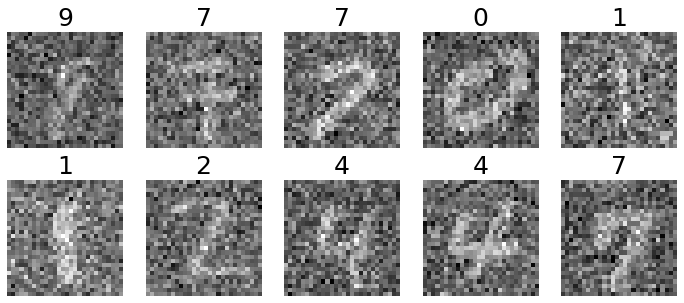

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,10000,size=10)
for i in range(10):
    axes[i].imshow(x_test_noisy[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(testY[idx[i]])), color= 'black', fontsize=25)
# plt.show()

In [12]:
from keras.utils import to_categorical
num_class=10
testY_onehot = to_categorical(testY, num_classes=num_class)
(loss, accuracy) = model.evaluate(x_test_noisy, testY_onehot,
	batch_size=128, verbose=1)

10000/10000 [==============================] - 1s 60us/step


In [13]:
accuracy

0.9495000243186951

In [16]:
p=model.predict(x_test_noisy)
y_pred=[]
y_test=[]
for i,v in enumerate(p):
    y_pred.append(np.argmax(v))
    y_test.append(np.argmax(testY_onehot[i]))


# %%
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test, y_pred)

# %%

array([[ 967,    0,    5,    0,    0,    0,    2,    2,    4,    0],
       [   0, 1082,    8,    5,    0,    2,    5,    4,   29,    0],
       [   5,    0,  989,    9,    1,    0,    2,    6,   20,    0],
       [   0,    1,    8,  965,    0,   16,    0,    4,   16,    0],
       [   0,    1,    8,    2,  909,    0,    7,    2,   17,   36],
       [   3,    0,    1,   21,    2,  832,    5,    1,   25,    2],
       [   7,    1,    1,    1,    6,   10,  923,    0,    9,    0],
       [   2,    5,   20,    8,    5,    0,    0,  959,   11,   18],
       [   4,    1,    5,   10,    4,    4,    3,    1,  941,    1],
       [   6,    3,    0,    9,   20,    8,    0,   13,   22,  928]])

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.95      0.97      1135
           2       0.95      0.96      0.95      1032
           3       0.94      0.96      0.95      1010
           4       0.96      0.93      0.94       982
           5       0.95      0.93      0.94       892
           6       0.97      0.96      0.97       958
           7       0.97      0.93      0.95      1028
           8       0.86      0.97      0.91       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

